This results are for DDR4-DDR4, just testing if by changing injection rate system shows expected behavior and becomes unstable at some high injection rate (which seems to be the case).
* With RD/WR WR/RD turn-around delay.
* Open-adaptive page policy.

In [1]:
import pandas as pd
import numpy as np
import sys
from matplotlib import pyplot as plt

import os

datadir = '/scr/babaie/rebasedDCJuly/resAug22/1'


def getStat(filename, stat):
    filename = os.path.join(filename).replace('\\','/')
    #print(stat)
    #print(filename)
    try:
        with open(filename) as f:
            readlines = f.readlines()
            for l in readlines:
                if stat in l:
                    return l
            return 0.0 #for cases where stat was not found
    except: #for cases where the file was not found
        return 0.0



Stats = ['system.generator.numPackets',
         'system.generator.avgReadLatency',
         'system.generator.avgWriteLatency',
         'system.generator.readBW',
         'system.generator.writeBW',
         'system.dcache_ctrl.avgORBLen',
         'system.dcache_ctrl.avgLocRdQLenStrt',
         'system.dcache_ctrl.avgLocWrQLenStrt',
         'system.dcache_ctrl.avgFarRdQLenStrt',
         'system.dcache_ctrl.avgFarWrQLenStrt',
         'system.dcache_ctrl.avgLocRdQLenEnq',
         'system.dcache_ctrl.avgLocWrQLenEnq',
         'system.dcache_ctrl.avgFarRdQLenEnq',
         'system.dcache_ctrl.avgFarWrQLenEnq',
         'system.dcache_ctrl.numWrBacks',
         'system.dcache_ctrl.totNumConf',
         'system.dcache_ctrl.totNumORBFull',
         'system.dcache_ctrl.totNumConfBufFull',
         'system.dcache_ctrl.maxNumConf',
         'system.dcache_ctrl.maxLocRdEvQ',
         'system.dcache_ctrl.maxLocRdRespEvQ',
         'system.dcache_ctrl.maxLocWrEvQ',
         'system.dcache_ctrl.maxFarRdEvQ',
         'system.dcache_ctrl.maxFarRdRespEvQ',
         'system.dcache_ctrl.maxFarWrEvQ',
         'system.dcache_ctrl.rdToWrTurnAround',
         'system.dcache_ctrl.wrToRdTurnAround',
         'system.dcache_ctrl.sentRdPort',
         'system.dcache_ctrl.failedRdPort',
         'system.dcache_ctrl.recvdRdPort',
         'system.dcache_ctrl.sentWrPort',
         'system.dcache_ctrl.failedWrPort',
         'system.dcache_ctrl.totPktsServiceTime',
         'system.dcache_ctrl.totPktsORBTime',
         'system.dcache_ctrl.totTimeFarRdtoSend',
         'system.dcache_ctrl.totTimeFarRdtoRecv',
         'system.dcache_ctrl.totTimeFarWrtoSend',
         'system.dcache_ctrl.totTimeInLocRead',
         'system.dcache_ctrl.totTimeInLocWrite',
         'system.dcache_ctrl.totTimeInFarRead',
         'system.dcache_ctrl.QTLocRd',
         'system.dcache_ctrl.QTLocWr',
         'system.dcache_ctrl.dram.avgQLat',
         'system.farMem_ctrl.dram.avgQLat',
         'system.farMem_ctrl.avgRdQLen',
         'system.farMem_ctrl.avgWrQLen'
          ]




hit_miss = ['MissClean', 'MissDirty']
link_latency = ['0', '200', '300', '400', '500', '600', '700', '800', '900', '1000', '1200', '1400', '1600', 
'2000', '2200', '2400', '2600', '2800', '3200', '3500', '3700', '4000', '5000', '6000', '7000', '10000', '20000']
rd_perc = ['RO']
inj_rate = ['812', '825', '837', '85', '9']

rows = []

for hm in hit_miss:
    for ir in inj_rate:
        for rdPr in rd_perc:
            for ll in link_latency:
                stats = [hm, ir, rdPr, ll]
                for stat in Stats:
                    time_file_path = '{}/{}_{}_{}_{}/stats.txt'.format(datadir, hm, ir, rdPr, ll)
                    ret_line = getStat(time_file_path,stat)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = -1
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df = pd.DataFrame(rows, columns=[
         'hm',
         'ir',
         'rdPr',
         'll',
         'numPackets',
         'avgReadLatency',
         'avgWriteLatency',
         'readBW',
         'writeBW',
         'avgORBLen',
         'avgLocRdQLenStrt',
         'avgLocWrQLenStrt',
         'avgFarRdQLenStrt',
         'avgFarWrQLenStrt',
         'avgLocRdQLenEnq',
         'avgLocWrQLenEnq',
         'avgFarRdQLenEnq',
         'avgFarWrQLenEnq',
         'numWrBacks',
         'totNumConf',
         'totNumORBFull',
         'totNumConfBufFull',
         'maxNumConf',
         'maxLocRdEvQ',
         'maxLocRdRespEvQ',
         'maxLocWrEvQ',
         'maxFarRdEvQ',
         'maxFarRdRespEvQ',
         'maxFarWrEvQ',
         'rdToWrTurnAround',
         'wrToRdTurnAround',
         'sentRdPort',
         'failedRdPort',
         'recvdRdPort',
         'sentWrPort',
         'failedWrPort',
         'totPktsServiceTime',
         'totPktsORBTime',
         'totTimeFarRdtoSend',
         'totTimeFarRdtoRecv',
         'totTimeFarWrtoSend',
         'totTimeInLocRead',
         'totTimeInLocWrite',
         'totTimeInFarRead',
         'QTLocRd',
         'QTLocWr',
         'loc.avgQLat',
         'far.avgQLat',
         'avgRdQLen',
         'avgWrQLen'
         ])

df['linkLat'] = (df['ll']).astype(int)/2
df['totBW'] = (df['readBW'].astype(float) + df['writeBW'].astype(float))/1000000000
df['ARL'] = (df['avgReadLatency'].astype(float))/1000
df['AWL'] = (df['avgWriteLatency'].astype(float))/1000

df['servTime'] = df['totPktsServiceTime'].astype(float)/df['numPackets'].astype(float)
df['orbTime'] = df['totPktsORBTime'].astype(float)/df['numPackets'].astype(float)

df['locRd'] = df['totTimeInLocRead'].astype(float)/df['numPackets'].astype(float)
df['farRd'] = df['totTimeInFarRead'].astype(float)/df['numPackets'].astype(float)
df['locWr'] = df['totTimeInLocWrite'].astype(float)/df['numPackets'].astype(float)

df['locRdQT'] = df['QTLocRd'].astype(float)/df['numPackets'].astype(float)
df['farRdQT'] = (df['totTimeFarRdtoSend'].astype(float)+df['totTimeFarRdtoRecv'].astype(float))/df['sentRdPort'].astype(float)
df['locWrQT'] = df['QTLocWr'].astype(float)/df['numPackets'].astype(float)
df['farWrQT'] = df['totTimeFarWrtoSend'].astype(float)/df['sentWrPort'].astype(float)
df['farRdWRT'] = df['totTimeFarRdtoRecv'].astype(float)/df['recvdRdPort'].astype(float)

df['locAvgQLat'] = df['loc.avgQLat'].astype(float)/1000
df['farAvgQLat'] = df['far.avgQLat'].astype(float)/1000



df.to_csv("/scr/babaie/rebasedDCJuly/resAug22/1/res_1.csv")

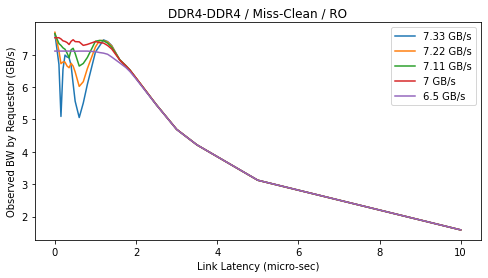

In [2]:
latency = [0, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7, 0.8, 1, 1.1, 1.2, 1.3, 1.4, 1.6, 1.75, 1.85, 2, 2.5, 3, 3.5, 5, 10]
df_temp = df.query('(hm==["MissClean"]) and (ir==["812"])')[['totBW']]
y1 = df_temp['totBW']
df_temp = df.query('(hm==["MissClean"]) and (ir==["825"])')[['totBW']]
y2 = df_temp['totBW']
df_temp = df.query('(hm==["MissClean"]) and (ir==["837"])')[['totBW']]
y3 = df_temp['totBW']
df_temp = df.query('(hm==["MissClean"]) and (ir==["85"])')[['totBW']]
y4 = df_temp['totBW']
df_temp = df.query('(hm==["MissClean"]) and (ir==["9"])')[['totBW']]
y5 = df_temp['totBW']

fig = plt.figure()
fig.set_size_inches(8, 4)

plt.plot(latency, y1, label ="7.33 GB/s") #8.12
plt.plot(latency, y2, label ="7.22 GB/s") #8.25
plt.plot(latency, y3, label ="7.11 GB/s") #8.37
plt.plot(latency, y4, label ="7 GB/s") #8.5
plt.plot(latency, y5, label ="6.5 GB/s") #9


plt.title("DDR4-DDR4 / Miss-Clean / RO")
plt.xlabel("Link Latency (micro-sec)")
plt.ylabel("Observed BW by Requestor (GB/s)")
plt.legend()
plt.show()

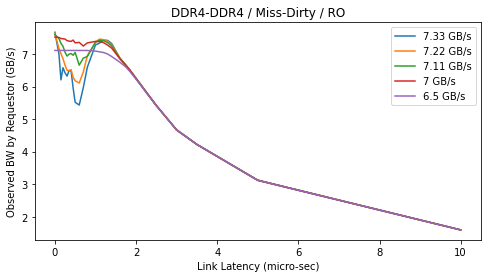

In [3]:
latency = [0, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7, 0.8, 1, 1.1, 1.2, 1.3, 1.4, 1.6, 1.75, 1.85, 2, 2.5, 3, 3.5, 5, 10]
df_temp = df.query('(hm==["MissDirty"]) and (ir==["812"])')[['totBW']]
y1 = df_temp['totBW']
df_temp = df.query('(hm==["MissDirty"]) and (ir==["825"])')[['totBW']]
y2 = df_temp['totBW']
df_temp = df.query('(hm==["MissDirty"]) and (ir==["837"])')[['totBW']]
y3 = df_temp['totBW']
df_temp = df.query('(hm==["MissDirty"]) and (ir==["85"])')[['totBW']]
y4 = df_temp['totBW']
df_temp = df.query('(hm==["MissDirty"]) and (ir==["9"])')[['totBW']]
y5 = df_temp['totBW']

fig = plt.figure()
fig.set_size_inches(8, 4)

plt.plot(latency, y1, label ="7.33 GB/s") #8.12
plt.plot(latency, y2, label ="7.22 GB/s") #8.25
plt.plot(latency, y3, label ="7.11 GB/s") #8.37
plt.plot(latency, y4, label ="7 GB/s") #8.5
plt.plot(latency, y5, label ="6.5 GB/s") #9


plt.title("DDR4-DDR4 / Miss-Dirty / RO")
plt.xlabel("Link Latency (micro-sec)")
plt.ylabel("Observed BW by Requestor (GB/s)")
plt.legend()
plt.show()